<a href="https://colab.research.google.com/github/BaoBaoCheng/Bao_AI/blob/main/Bao_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun May 16 16:53:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    60W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)
import numpy as np
# 取消科學記號顯示方式
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

In [ ]:
#下載mnist資料集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print('x_train\nshape:{},data type:{}'.format(x_train.shape, x_train.dtype))
print('y_train\nshape:{},data type:{}'.format(y_train.shape, y_train.dtype))
print('x_test\nshape:{},data type:{}'.format(x_test.shape, x_test.dtype))
print('y_test\nshape:{},data type:{}'.format(y_test.shape, y_test.dtype))

x_train
shape:(60000, 28, 28),data type:uint8
y_train
shape:(60000,),data type:uint8
x_test
shape:(10000, 28, 28),data type:uint8
y_test
shape:(10000,),data type:uint8


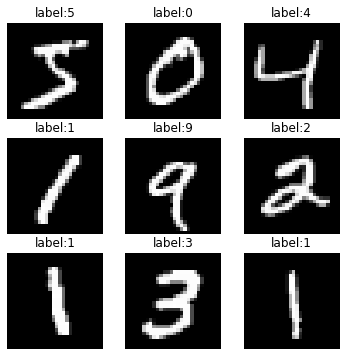

In [ ]:
plt.figure(figsize=(6, 6))
for i, (images, labels) in enumerate(zip(x_train[0:9], y_train[0:9])):
    plt.subplot(3,3, i+1)
    plt.imshow(images, cmap='gray')
    plt.title('label:{}'.format(labels))
    plt.axis('off')

In [ ]:
model = tf.keras.Sequential(
  [
   tf.keras.Input(shape=(28, 28, 1)),
   tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D(pool_size=(2,2)),
   tf.keras.layers.Flatten(),
   #tf.keras.layers.Reshape((-1,32)),
   #tf.keras.layers.LSTM(10),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(10, activation='softmax')
  ]
)

# 查看model資訊
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dropout (Dropout)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                125450    
Total params: 126,090
Trainable params: 126,090
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 轉換為float32，以及做歸一化處理
# data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# label
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
# model模型input shape為(batch size, 28, 28, 1)需做修改
x_train = np.expand_dims(x_train, -1)
y_train = np.expand_dims(y_train, -1)
x_test = np.expand_dims(x_test, -1)
y_test = np.expand_dims(y_test, -1)

#修改後的shape與dtype
print('x_train\nshape:{},data type:{}'.format(x_train.shape, x_train.dtype))
print('y_train\nshape:{},data type:{}'.format(y_train.shape, y_train.dtype))
print('x_test\nshape:{},data type:{}'.format(x_test.shape, x_test.dtype))
print('y_test\nshape:{},data type:{}'.format(y_test.shape, y_test.dtype))

x_train
shape:(60000, 28, 28, 1),data type:float32
y_train
shape:(60000, 1),data type:float32
x_test
shape:(10000, 28, 28, 1),data type:float32
y_test
shape:(10000, 1),data type:float32


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
met = tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(
  optimizer = opt,
  loss = loss,
  metrics = [met]
)

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
422/422 [==============================] - 6s 10ms/step - loss: 1.5821 - sparse_categorical_accuracy: 0.6315 - val_loss: 0.3750 - val_sparse_categorical_accuracy: 0.9110
Epoch 2/50
422/422 [==============================] - 4s 9ms/step - loss: 0.4227 - sparse_categorical_accuracy: 0.8853 - val_loss: 0.2596 - val_sparse_categorical_accuracy: 0.9292
Epoch 3/50
422/422 [==============================] - 4s 9ms/step - loss: 0.3229 - sparse_categorical_accuracy: 0.9087 - val_loss: 0.2207 - val_sparse_categorical_accuracy: 0.9400
Epoch 4/50
422/422 [==============================] - 4s 9ms/step - loss: 0.2800 - sparse_categorical_accuracy: 0.9198 - val_loss: 0.1965 - val_sparse_categorical_accuracy: 0.9473
Epoch 5/50
422/422 [==============================] - 4s 9ms/step - loss: 0.2549 - sparse_categorical_accuracy: 0.9262 - val_loss: 0.1760 - val_sparse_categorical_accuracy: 0.9532
Epoch 6/50
422/422 [==============================] - 4s 9ms/step - loss: 0.2288 - sparse_categoric

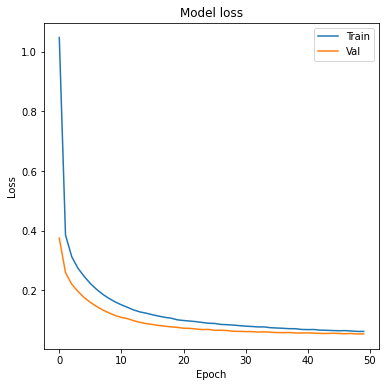

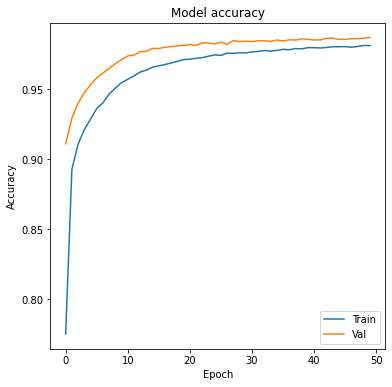

In [ ]:
plt.figure(figsize=(6, 6))
# drow loss log
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.figure(figsize=(6, 6))
# drow acc log
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')

In [ ]:
history.history['sparse_categorical_accuracy']

[0.7753518223762512,
 0.8927407264709473,
 0.910703718662262,
 0.9210740923881531,
 0.9285926222801208,
 0.9360926151275635,
 0.9401666522026062,
 0.9465555548667908,
 0.9507407546043396,
 0.9546296000480652,
 0.9570370316505432,
 0.9594259262084961,
 0.9621666669845581,
 0.9635370373725891,
 0.9656296372413635,
 0.9666110873222351,
 0.9675185084342957,
 0.968666672706604,
 0.9698333144187927,
 0.9711111187934875,
 0.9713147878646851,
 0.9719629883766174,
 0.9724629521369934,
 0.9734814763069153,
 0.974407434463501,
 0.9740555286407471,
 0.9756481647491455,
 0.9755740761756897,
 0.9758148193359375,
 0.9758333563804626,
 0.9765926003456116,
 0.9768518805503845,
 0.9775555729866028,
 0.9770925641059875,
 0.9775925874710083,
 0.9783703684806824,
 0.9780740737915039,
 0.9789259433746338,
 0.9787222146987915,
 0.9795555472373962,
 0.9795555472373962,
 0.9793333411216736,
 0.9796851873397827,
 0.980222225189209,
 0.980222225189209,
 0.9803147912025452,
 0.9798333048820496,
 0.980425953865051

In [ ]:
score = model.evaluate(x_test, y_test)
print('test loss:', score[0])
print('test accuracy', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0560 - sparse_categorical_accuracy: 0.9825
test loss: 0.055952996015548706
test accuracy 0.9825000166893005


In [ ]:
result = model.predict(x_test[0:5])
print(result)
print('前5筆預測結果:\n',np.argmax(result, axis=-1))
print('前5筆實際值:\n', y_test[0:5].reshape(-1,).astype('int32'))

[[0.         0.         0.00000042 0.00005456 0.         0.00000008
  0.         0.99993837 0.00000023 0.00000629]
 [0.00000048 0.0000232  0.99995697 0.00000009 0.         0.00000033
  0.0000186  0.         0.0000002  0.        ]
 [0.00002988 0.9991636  0.00022846 0.0000036  0.00029442 0.00000234
  0.0000404  0.00010865 0.00012694 0.00000169]
 [0.9998864  0.00000001 0.00002825 0.00000014 0.0000002  0.00000129
  0.00007185 0.0000068  0.00000239 0.00000269]
 [0.00000071 0.00000021 0.00000089 0.00000071 0.9998171  0.00000001
  0.00000074 0.00001709 0.00000182 0.0001607 ]]
前5筆預測結果:
 [7 2 1 0 4]
前5筆實際值:
 [7 2 1 0 4]
